In [3]:
import os
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import h5py
from oasis.functions import deconvolve
from oasis import oasisAR1, oasisAR2
import pyute as ut

from importlib import reload
reload(ut)
import scipy.ndimage.filters as sfi
import scipy.stats as sst
import scipy.ndimage.measurements as snm
from mpl_toolkits.mplot3d import Axes3D
import figure_ground_analysis as fg
reload(fg)
import pdb

In [12]:
os.remove('figure_ground_proc.hdf5')

In [4]:
ret = {}
paramdict = {}
pval = {}
trialrun = {}
nbydepth = {}
spont = {}

In [5]:
# folds = []
# files = []
# rets = []
# adjust_fns = []

# def tack_on(thisfold,thisfile,retnumber,frame_adjust=None):
#     folds.append(thisfold)
#     files.append(thisfile)
#     rets.append(retnumber)
#     adjust_fns.append(frame_adjust)

# thisfold = '170808/M7194/'
# thisfile = 'M7194_999_000'
# retnumber = '000'
# tack_on(thisfold,thisfile,retnumber)
    
# thisfold = '180327/M8570/'
# thisfile = 'M8570_151_002'
# retnumber = '000'
# frame_adjust = lambda x: np.delete(np.delete(x,990),0)
# tack_on(thisfold,thisfile,retnumber,frame_adjust)

folds = []
files = []
rets = []
adjust_fns = []
rgs = []
criteria = []
datafoldbases = []


def tack_on(thisfold,thisfile,retnumber,frame_adjust=None,rg=(1,0),criterion=lambda x: np.abs(x)>100,datafoldbase=None):
    folds.append(thisfold)
    files.append(thisfile)
    rets.append(retnumber)
    adjust_fns.append(frame_adjust)
    rgs.append(rg)
    criteria.append(criterion)
    datafoldbases.append(datafoldbase)
    

# thisfold = '180530/M8174/'
# thisfile = 'M8174_130_003'
# retnumber = '002'
# criterion = lambda x: np.abs(x)>100
# rg = (1,0)
# tack_on(thisfold,thisfile,retnumber,rg=rg,criterion=criterion)

# thisfold = '180220/M7254/'
# thisfile = 'M7254_150_005'
# retnumber = '000'
# datafoldbase = '/home/mossing/scratch/2Pdata/'
# tack_on(thisfold,thisfile,retnumber,datafoldbase=datafoldbase)

# thisfold = '180216/M7307/'
# thisfile = 'M7307_120_003'
# retnumber = '000'
# rg = (1,-1)
# tack_on(thisfold,thisfile,retnumber,rg=rg)

thisfold = '181209/M8536/'
thisfile = 'M8536_165_004'
retnumber = '002'
datafoldbase = '/media/mossing/backup_1/data/2P/'
rg = (1,0)
frame_adjust = lambda x: np.delete(x,0)
tack_on(thisfold,thisfile,retnumber,rg=rg,datafoldbase=datafoldbase)

# thisfold = '181213/M8536/' # HAVEN'T MADE ROIS YET FOR THIS
# thisfile = 'M8536_155_003'
# retnumber = '001'
# datafoldbase = '/media/mossing/backup_1/data/2P/'
# rg = (1,0)
# frame_adjust = lambda x: np.delete(x,0)
# tack_on(thisfold,thisfile,retnumber,rg=rg,datafoldbase=datafoldbase)

# thisfold = '181214/M10130/' # HAVEN'T MADE ROIS YET FOR THIS
# thisfile = 'M10130_135_003'
# retnumber = '001'
# datafoldbase = '/media/mossing/backup_1/data/2P/'
# rg = (1,0)
# frame_adjust = lambda x: np.delete(x,0)
# tack_on(thisfold,thisfile,retnumber,rg=rg,datafoldbase=datafoldbase)

thisfold = '190128/M8982/'
thisfile = 'M8982_200_004'
retnumber = '002'
datafoldbase = '/media/mossing/backup_1/data/2P/'
rg = (1,0)
frame_adjust = lambda x: np.delete(x,0)
tack_on(thisfold,thisfile,retnumber,rg=rg,datafoldbase=datafoldbase)

thisfold = '190130/M9667/'
thisfile = 'M9667_135_003'
retnumber = '001'
datafoldbase = '/media/mossing/backup_1/data/2P/'
rg = (1,0)
frame_adjust = lambda x: np.delete(x,0)
tack_on(thisfold,thisfile,retnumber,rg=rg,datafoldbase=datafoldbase)

thisfold = '190131/M9355/'
thisfile = 'M9355_165_003'
retnumber = '001'
datafoldbase = '/media/mossing/backup_1/data/2P/'
rg = (1,-1)
frame_adjust = lambda x: np.delete(x,0)
tack_on(thisfold,thisfile,retnumber,rg=rg,datafoldbase=datafoldbase)

thisfold = '190208/M9355/'
thisfile = 'M9355_175_005'
retnumber = '003'
datafoldbase = '/media/mossing/data_ssd/data/2P/'
rg = (1,0)
frame_adjust = lambda x: np.delete(x,0)
tack_on(thisfold,thisfile,retnumber,rg=rg,datafoldbase=datafoldbase)

thisfold = '190212/M8536/'
thisfile = 'M8536_150_006'
retnumber = '004'
datafoldbase = '/media/mossing/data_ssd/data/2P/'
rg = (1,0)
frame_adjust = lambda x: np.delete(x,0)
tack_on(thisfold,thisfile,retnumber,rg=rg,datafoldbase=datafoldbase)

In [12]:
keylist = list(proc.keys())
proc[keylist[0]].keys()

dict_keys(['Smean', 'lb', 'ub', 'pval_fig', 'pval_grnd', 'trialrun', 'strialwise', 'dtrialwise', 'trialwise', 'dfof', 'trialwise_t_offset', 'order', 'angle', 'paramdict', 'Sspont'])

In [44]:
reload(ut)
reload(fg)
procname = 'figure_ground_proc.hdf5'
os.remove(procname)
# soriavg,strialavg,lb,ub,pval_fig,pval_grnd,nbydepth = fg.analyze_everything(folds,files,rets,adjust_fns)
soriavg = fg.analyze_everything_by_criterion(folds,files,rets,[None]*len(folds),datafoldbase=datafoldbases,stimfoldbase='/home/mossing/modulation/visual_stim/',rgs=rgs,procname=procname)

/media/mossing/backup_1/data/2P/181209/M8536/ot/M8536_165_004_ot_000.rois
(412, 3291)
/media/mossing/backup_1/data/2P/181209/M8536/ot/M8536_165_004_ot_001.rois
(401, 3291)
/media/mossing/backup_1/data/2P/181209/M8536/ot/M8536_165_004_ot_002.rois
(418, 3291)
/media/mossing/backup_1/data/2P/181209/M8536/ot/M8536_165_004_ot_003.rois
(457, 3291)
roi 412 all zeros


/home/mossing/Documents/code/downloads/OASIS/oasis/functions.py:164: RuntimeWarning: invalid value encountered in multiply
  penalty=penalty, **kwargs)


(1688, 400, 12)


/home/mossing/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2247: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


deleted one
loaded retinotopy file
/media/mossing/backup_1/data/2P/190128/M8982/ot/M8982_200_004_ot_000.rois
(278, 6369)
roi 134 all zeros
/media/mossing/backup_1/data/2P/190128/M8982/ot/M8982_200_004_ot_001.rois
(357, 6369)
roi 162 all zeros
/media/mossing/backup_1/data/2P/190128/M8982/ot/M8982_200_004_ot_002.rois
(313, 6369)
/media/mossing/backup_1/data/2P/190128/M8982/ot/M8982_200_004_ot_003.rois
(396, 6369)
(1344, 400, 16)
deleted one
loaded retinotopy file
/media/mossing/backup_1/data/2P/190130/M9667/ot/M9667_135_003_ot_000.rois
(343, 6347)
roi 150 all zeros
/media/mossing/backup_1/data/2P/190130/M9667/ot/M9667_135_003_ot_001.rois
(355, 6347)
/media/mossing/backup_1/data/2P/190130/M9667/ot/M9667_135_003_ot_002.rois
(348, 6347)
/media/mossing/backup_1/data/2P/190130/M9667/ot/M9667_135_003_ot_003.rois
(270, 6347)
(1316, 400, 16)
deleted one
loaded retinotopy file
/media/mossing/backup_1/data/2P/190131/M9355/ot/M9355_165_003_ot_000.rois
(255, 8573)
/media/mossing/backup_1/data/2P/190

In [10]:
pdb.pm()

> /home/mossing/Documents/code/adesnal/pyute.py(851)dict_to_hdf5()
-> assert(not groupname in f.keys())
(Pdb) groupname
'session_181209_M8536'
(Pdb) f.keys()
KeysView(<Closed HDF5 file>)
(Pdb) exit


In [45]:
reload(fg)
with h5py.File('figure_ground_proc.hdf5',mode='r') as proc:
    keylist = list([x for x in proc.keys() if not x[0]=='_'])
    fg.add_data_struct_h5('pyr_l23_data_struct.hdf5', keylist=keylist, frame_rate_dict=None, proc=proc, nbefore=8, nafter=8)

<HDF5 group "/session_181209_M8536/ret_vars/paramdict_normal" (10 members)>
<HDF5 group "/session_190128_M8982/ret_vars/paramdict_normal" (10 members)>
<HDF5 group "/session_190130_M9667/ret_vars/paramdict_normal" (10 members)>
<HDF5 group "/session_190131_M9355/ret_vars/paramdict_normal" (10 members)>
<HDF5 group "/session_190208_M9355/ret_vars/paramdict_normal" (10 members)>
<HDF5 group "/session_190212_M8536/ret_vars/paramdict_normal" (10 members)>


In [33]:
pdb.pm()

> /home/mossing/Documents/notebooks/figure_ground/mtrand.pyx(1121)mtrand.RandomState.choice()
(Pdb) exit


In [8]:
order = ['ctrl','fig','grnd','iso','cross']

In [9]:
ontarget = {}
for key in soriavg.keys():
    ontarget[key] = np.logical_and(pval_fig[key].min(1)<5e-2,pval_grnd[key].min(1)>5e-2)
    print(np.nanmin(pval_grnd[key]))

NameError: name 'pval_fig' is not defined

In [53]:
proc[thisfold].keys()

dict_keys(['Smean', 'lb', 'ub', 'pval_fig', 'pval_grnd', 'trialrun', 'strialwise', 'dtrialwise', 'trialwise', 'dfof', 'trialwise_t_offset', 'order', 'angle', 'paramdict', 'Sspont'])

<IPython.core.display.Javascript object>


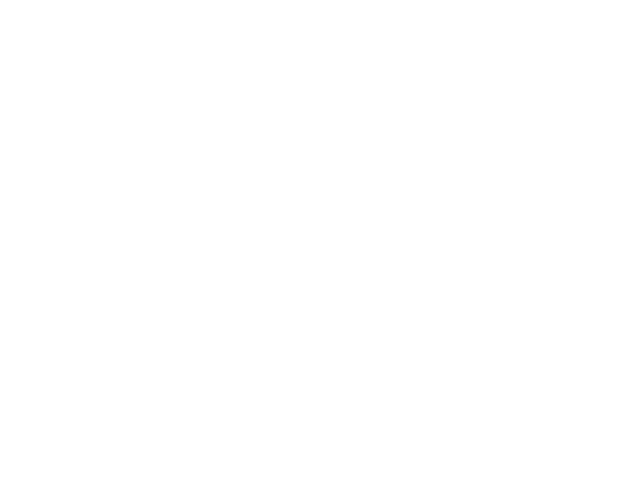

NameError: name 'pval_grnd' is not defined

In [47]:
plt.figure()
plt.hist(pval_grnd[thisfold])

In [295]:
pval_fig[thisfold]

array([[  8.51119281e-04,   1.14400299e-03,   4.92352824e-05,
          5.90428280e-04],
       [  3.03389745e-02,   6.03692792e-03,   1.91619633e-04,
          7.37126476e-02],
       [  2.37790527e-05,   3.85337082e-04,   4.04265204e-04,
          4.28374935e-02],
       ..., 
       [  6.23027868e-01,   5.44905963e-01,   5.16409197e-01,
          9.91333428e-01],
       [  2.41834824e-01,   1.58718242e-01,   9.48173865e-01,
          5.29400593e-01],
       [  4.17358316e-04,   4.43271095e-02,   2.57569522e-01,
          8.36746895e-02]])

<IPython.core.display.Javascript object>


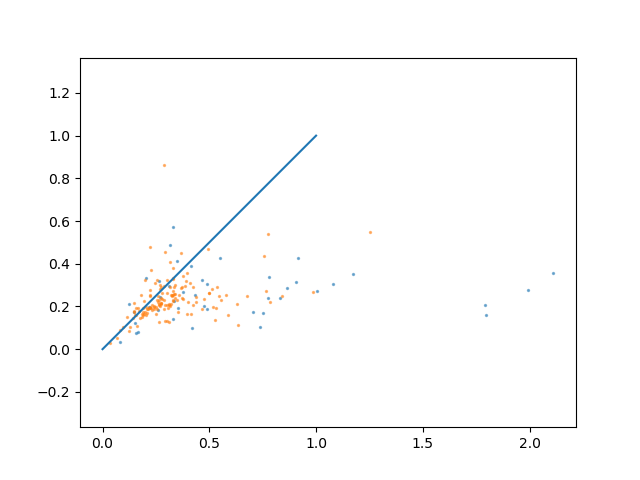

In [297]:
plt.figure()
for key in soriavg.keys():
    plt.scatter(soriavg[key][ontarget[key]][:,1],soriavg[key][ontarget[key]][:,3],s=2,alpha=0.5)
    plt.axis('equal')
plt.plot((0,1),(0,1))

<IPython.core.display.Javascript object>


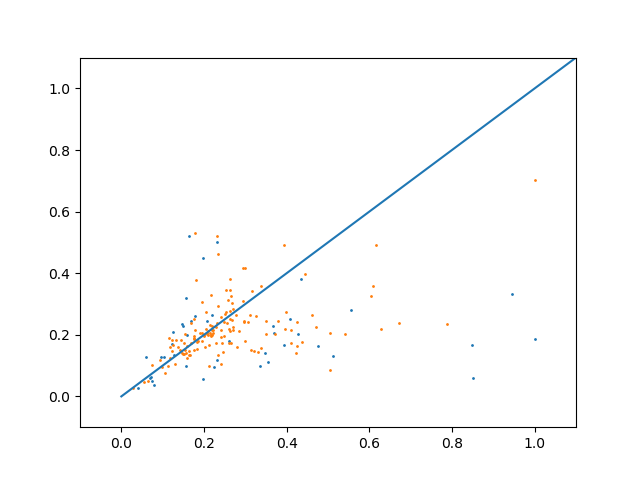

In [309]:
plt.figure()
XX = np.array(())
YY = np.array(())
for key in soriavg.keys():
    mx = soriavg[key][ontarget[key]].max()[np.newaxis]
    xx = soriavg[key][ontarget[key],1]/mx
    yy = soriavg[key][ontarget[key],4]/mx
    plt.scatter(xx,yy,s=1)
    XX = ut.add_to_array(XX,xx)
    YY = ut.add_to_array(YY,yy)
plt.plot((0,4),(0,4))
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)

matdict = {}
matdict['dataX'] = XX
matdict['dataY'] = YY
matdict['labelX'] = 'inferred event rate iso-oriented'
matdict['labelY'] = 'inferred event rate cross-oriented'
sio.savemat('updated_pc_iso_cross.mat',matdict)

<IPython.core.display.Javascript object>


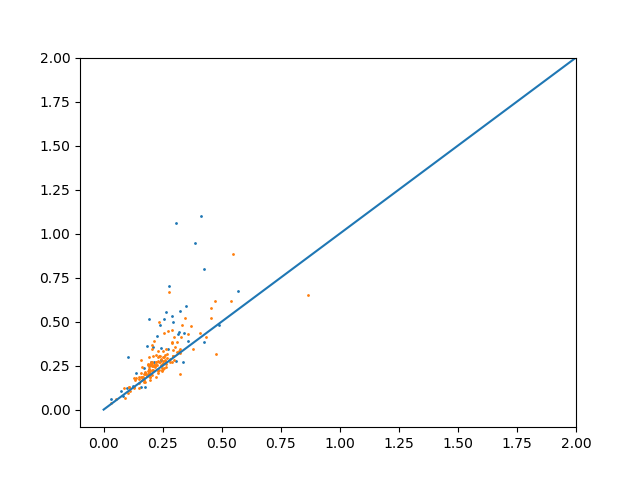

In [310]:
plt.figure()
XX = np.array(())
YY = np.array(())
for key in soriavg.keys():
    mx = 1 #soriavg[key][ontarget[key]].max()[np.newaxis]
    xx = soriavg[key][ontarget[key],3]/mx
    yy = soriavg[key][ontarget[key],4]/mx
    plt.scatter(xx,yy,s=1)
    XX = ut.add_to_array(XX,xx)
    YY = ut.add_to_array(YY,yy)
plt.plot((0,4),(0,4))
plt.xlim(-0.1,2)
plt.ylim(-0.1,2)

matdict = {}
matdict['dataX'] = XX
matdict['dataY'] = YY
matdict['labelX'] = 'inferred event rate iso-oriented'
matdict['labelY'] = 'inferred event rate cross-oriented'
sio.savemat('updated_pc_iso_cross_non_norm.mat',matdict)

<IPython.core.display.Javascript object>


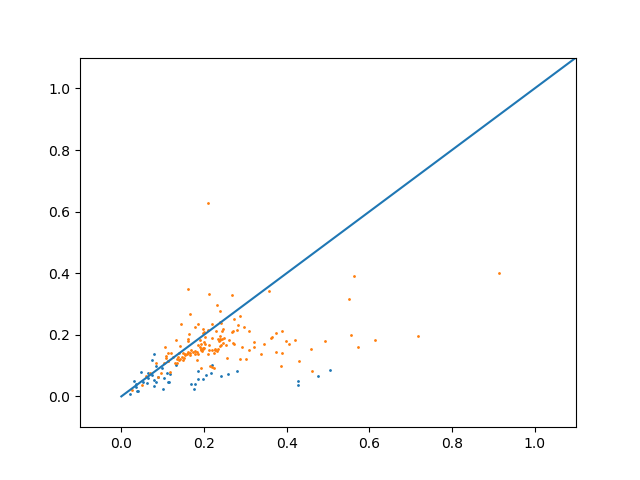

In [313]:
plt.figure()
XX = np.array(())
YY = np.array(())
for key in soriavg.keys():
    mx = soriavg[key].max()[np.newaxis]
    xx = soriavg[key][ontarget[key],1]/mx
    yy = soriavg[key][ontarget[key],3]/mx
    plt.scatter(xx,yy,s=1)
    XX = ut.add_to_array(XX,xx)
    YY = ut.add_to_array(YY,yy)
plt.plot((0,4),(0,4))
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)

matdict = {}
matdict['dataX'] = XX
matdict['dataY'] = YY
matdict['labelX'] = 'inferred event rate CRF only'
matdict['labelY'] = 'inferred event rate iso-oriented'
sio.savemat('updated_pc_center_iso.mat',matdict)

<IPython.core.display.Javascript object>


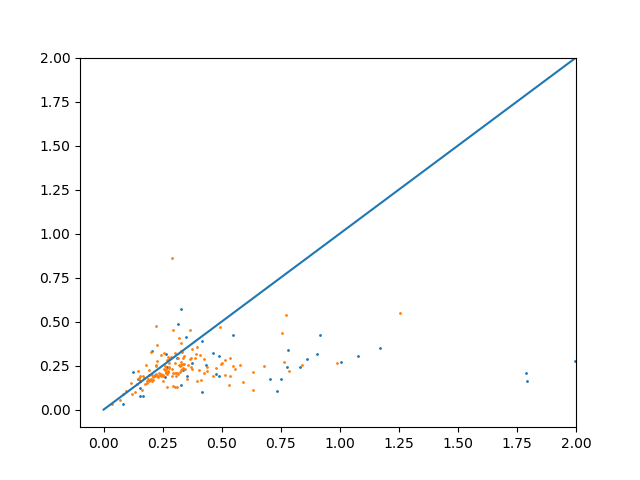

In [314]:
plt.figure()
XX = np.array(())
YY = np.array(())
for key in soriavg.keys():
    mx = 1 #soriavg[key][ontarget[key]].max()[np.newaxis]
    xx = soriavg[key][ontarget[key],1]/mx
    yy = soriavg[key][ontarget[key],3]/mx
    plt.scatter(xx,yy,s=1)
    XX = ut.add_to_array(XX,xx)
    YY = ut.add_to_array(YY,yy)
plt.plot((0,4),(0,4))
plt.xlim(-0.1,2)
plt.ylim(-0.1,2)

matdict = {}
matdict['dataX'] = XX
matdict['dataY'] = YY
matdict['labelX'] = 'inferred event rate CRF only'
matdict['labelY'] = 'inferred event rate iso-oriented'
sio.savemat('updated_pc_center_iso_non_norm.mat',matdict)

In [319]:
traces,ctraces,straces,dfofall,baselineall = gen_traces([datafold+file for file in datafiles])

In [320]:
traces.shape

(160, 6327)

In [327]:
_,_,_,g,_ = deconvolve(dfofall[0],penalty=1,sn=5e-4)

In [328]:
g

0.9143086482684939

<IPython.core.display.Javascript object>


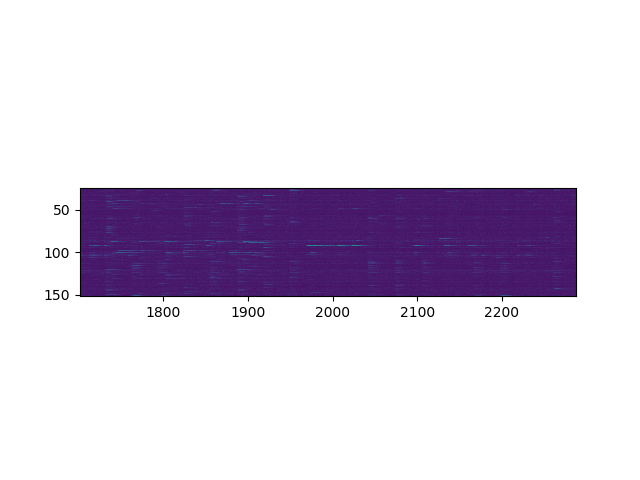

In [323]:
plt.figure()
plt.imshow(dfofall)

<IPython.core.display.Javascript object>


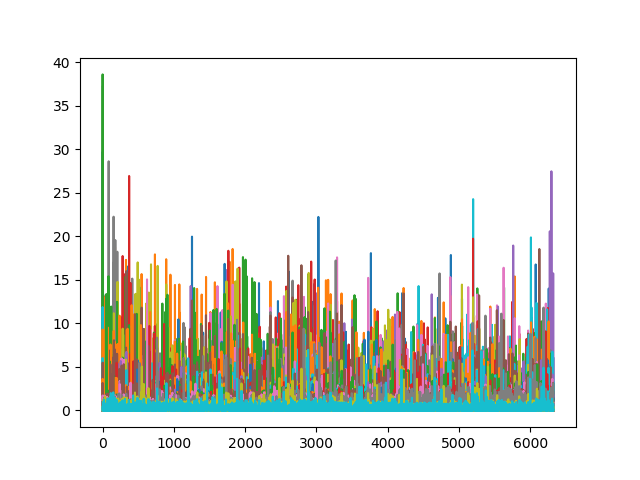

In [325]:
plt.figure()
plt.plot(straces.T)

In [230]:
# blcutoff = 1
# ds = 10
# blspan = 3000
# nbefore = 4
# nafter = 4
# def gen_trialwise(datafiles,blcutoff=blcutoff,blspan=blspan,frame_adjust=None): #nbefore=nbefore,nafter=nafter
#     trialwise = np.array(())
#     ctrialwise = np.array(())
#     strialwise = np.array(())
#         for datafile in datafiles:
#             frm = sio.loadmat(datafile.replace('.rois','.mat'),squeeze_me=True)['info']['frame'][()]
#             if frame_adjust:
#                 frm = frame_adjust(frm)
#             if np.remainder(frm.shape[0],2):
#                 frm = frm[:-1]
#             with h5py.File(datafile,mode='r') as f:
#                 to_add = f['corrected'][:].T
#                 to_add[np.isnan(to_add)] = 0
#                 baseline = sfi.percentile_filter(to_add[:,::ds],blcutoff,(1,int(blspan/ds)))
#                 baseline = np.repeat(baseline,ds,axis=1)
#                 for i in range(baseline.shape[0]):
#                     baseline[i] = sfi.gaussian_filter1d(baseline[i],blspan/2)
#                 if baseline.shape[1]>to_add.shape[1]:
#                     baseline = baseline[:,:to_add.shape[1]]
#                 c = np.zeros_like(to_add)
#                 s = np.zeros_like(to_add)
#                 for i in range(c.shape[0]):
#                     dfof = (to_add[i]-baseline[i,:])/baseline[i,:]
#                     try:
#                         c[i],s[i],_,_,_  = deconvolve(dfof,penalty=1) #,sn=5e-3)
#                     except:
#                         print("in "+datafile+" couldn't do "+str(i))
#                 to_add_temp = ut.trialize(to_add,frm,nbefore,nafter)
#                 ctemp = ut.trialize(c,frm,nbefore,nafter)
#                 stemp = ut.trialize(s,frm,nbefore,nafter)
#                 try:
#                     trialwise = np.concatenate((trialwise,to_add_temp),axis=0)
#                     ctrialwise = np.concatenate((ctrialwise,ctemp),axis=0)
#                     strialwise = np.concatenate((strialwise,stemp),axis=0)
#                 except:
#                     trialwise = to_add_temp.copy()
#                     ctrialwise = ctemp.copy()
#                     strialwise = stemp.copy()
#     return trialwise,ctrialwise,strialwise

IndentationError: unexpected indent (<ipython-input-230-e0246ed1274e>, line 42)

In [231]:
#     blcutoff = 1
#     ds = 10
#     blspan = 3000
#     nbefore = 4
#     nafter = 4
#     def gen_trialwise(datafiles,blcutoff=blcutoff,blspan=blspan,frame_adjust=None): 
#         trialwise = np.array(())
#         ctrialwise = np.array(())
#         strialwise = np.array(())
#         for datafile in datafiles:
#             frm = sio.loadmat(datafile.replace('.rois','.mat'),squeeze_me=True)['info']['frame'][()]
#             if frame_adjust:
#                 frm = frame_adjust(frm)
#             if np.remainder(frm.shape[0],2):
#                 frm = frm[:-1]
#             with h5py.File(datafile,mode='r') as f:
#                 to_add = f['corrected'][:].T
#                 to_add[np.isnan(to_add)] = 0
#                 baseline = sfi.percentile_filter(to_add[:,::ds],blcutoff,(1,int(blspan/ds)))
#                 baseline = np.repeat(baseline,ds,axis=1)
#                 for i in range(baseline.shape[0]):
#                     baseline[i] = sfi.gaussian_filter1d(baseline[i],blspan/2)
#                 if baseline.shape[1]>to_add.shape[1]:
#                     baseline = baseline[:,:to_add.shape[1]]
#                 c = np.zeros_like(to_add)
#                 s = np.zeros_like(to_add)
#                 for i in range(c.shape[0]):
#                     dfof = (to_add[i]-baseline[i,:])/baseline[i,:]
#                     try:
#                         c[i],s[i],_,_,_  = deconvolve(dfof,penalty=1,sn=5e-3)
#                     except:
#                         print("in "+datafile+" couldn't do "+str(i))
#                 to_add_temp = ut.trialize(to_add,frm,nbefore,nafter)
#                 ctemp = ut.trialize(c,frm,nbefore,nafter)
#                 stemp = ut.trialize(s,frm,nbefore,nafter)
#                 try:
#                     trialwise = np.concatenate((trialwise,to_add_temp),axis=0)
#                     ctrialwise = np.concatenate((ctrialwise,ctemp),axis=0)
#                     strialwise = np.concatenate((strialwise,stemp),axis=0)
#                 except:
#                     trialwise = to_add_temp.copy()
#                     ctrialwise = ctemp.copy()
#                     strialwise = stemp.copy()
#         return trialwise,ctrialwise,strialwise

In [232]:
# def get_nbydepth(datafiles):
#     nbydepth = np.zeros((len(datafiles),))
#     for i,datafile in enumerate(datafiles):
#         with h5py.File(datafile,mode='r') as f:
#             nbydepth[i] = (f['corrected'][:].T.shape[0])
#     return nbydepth

In [316]:
#     def gen_traces(datafiles,blcutoff=blcutoff,blspan=blspan): #nbefore=nbefore,nafter=nafter
#         trialwise = np.array(())
#         ctrialwise = np.array(())
#         strialwise = np.array(())
#         dfofall = np.array(())
#         baselineall = np.array(())
#         for datafile in datafiles:
#             frm = sio.loadmat(datafile.replace('.rois','.mat'),squeeze_me=True)['info']['frame'][()][2:-10]
#             with h5py.File(datafile,mode='r') as f:
#                 to_add = f['corrected'][:].T
#                 to_add[np.isnan(to_add)] = 0
#     #             baseline = np.percentile(to_add,blcutoff,axis=1)
#                 baseline = sfi.percentile_filter(to_add[:,::ds],blcutoff,(1,int(blspan/ds)))
#                 baseline = np.repeat(baseline,ds,axis=1)
#                 for i in range(baseline.shape[0]):
#                     baseline[i] = sfi.gaussian_filter1d(baseline[i],blspan/2)
#     #             if baseline.shape[1]<to_add.shape[1]:
#     #                 baseline = np.hstack((baseline,np.repeat(baseline[:,-1],to_add.shape[1]-baseline.shape[1])))
#                 if baseline.shape[1]>to_add.shape[1]:
#                     baseline = baseline[:,:to_add.shape[1]]
#                 c = np.zeros_like(to_add)
#                 s = np.zeros_like(to_add)
#                 dfof = np.zeros_like(to_add)
#                 for i in range(c.shape[0]):
#     #                 dfof = (to_add[i]-baseline[i,np.newaxis])/baseline[i,np.newaxis]
#                     dfof[i] = (to_add[i]-baseline[i,:])/baseline[i,:]
#                     try:
#                         c[i],s[i],_,_,_  = deconvolve(dfof[i],penalty=1,sn=5e-4)
#                     except:
# #                         throwaway = 0
#                         print("in "+datafile+" couldn't do "+str(i))
#                 try:
#                     trialwise = np.concatenate((trialwise,to_add),axis=0)
#                     ctrialwise = np.concatenate((ctrialwise,c),axis=0)
#                     strialwise = np.concatenate((strialwise,s),axis=0)
#                     dfofall = np.concatenate((dfofall,dfof),axis=0)
#                     baselineall = np.concatenate((baselineall,baseline),axis=0)
#                 except:
#                     trialwise = to_add.copy()
#                     ctrialwise = c.copy()
#                     strialwise = s.copy()
#                     dfofall = dfof.copy()
#                     baselineall = baseline.copy()
#         return trialwise,ctrialwise,strialwise,dfofall,baselineall

In [283]:
# def analyze_figure_ground(datafiles,stimfile,retfile=None,frame_adjust=None):
#     nbydepth = get_nbydepth(datafiles)
#     trialwise,ctrialwise,strialwise = ut.gen_precise_trialwise(datafiles,frame_adjust=frame_adjust)
#     zstrialwise = sst.zscore(strialwise.reshape((strialwise.shape[0],-1)).T).T.reshape(strialwise.shape)
    
#     result = sio.loadmat(stimfile,squeeze_me=True)['result'][()]
    
#     infofile = sio.loadmat(datafiles[0][:-5]+'.mat',squeeze_me=True)
#     frame = infofile['info'][()]['frame'][()]
#     if frame_adjust:
#         print('adjusted')
#         frame = frame_adjust(frame)
#     if np.remainder(frame.shape[0],2):
#         print('deleted one')
#         frame = frame[:-1]
    
#     data = strialwise #[:,:,nbefore:-nafter]
    
#     try:
#         dxdt = sio.loadmat(datafiles[1],squeeze_me=True)['dxdt']
#     except:
#         with h5py.File(datafiles[1],mode='r') as f:
#             dxdt = f['dxdt'][:].T
            
#     trialrun = np.zeros(frame[0::2].shape)
#     for i in range(len(trialrun)):
#         trialrun[i] = dxdt[frame[0::2][i]:frame[1::2][i]].mean()
#     runtrial = trialrun>0#100
    
#     pval = np.zeros(strialwise.shape[0])
#     for i in range(strialwise.shape[0]):
#         _,pval[i] = sst.ttest_rel(strialwise[i,:,nbefore-1],strialwise[i,:,nbefore+1])
        
#     stimparams = result['stimParams']
    
#     order = ['ctrl','fig','grnd','iso','cross']
#     norder = len(order)
#     ori = stimparams[0]
#     sz = stimparams[1]
#     figContrast = stimparams[-2]
#     grndContrast = stimparams[-1]

#     paramdict = {}
#     paramdict['ctrl'] = np.logical_and(figContrast==0,grndContrast==0)
#     paramdict['fig'] = np.logical_and(figContrast==1,grndContrast==0)
#     paramdict['grnd'] = np.logical_and(np.logical_and(figContrast==0,grndContrast==1),sz>0)
#     paramdict['iso'] = sz==0
#     paramdict['cross'] = np.logical_and(figContrast==1,grndContrast==1)
        
# #     indexlut,stimp = np.unique(stimparams,axis=1,return_inverse=True)
    
#     angle = stimparams[0]
# #     size = stimparams[1]
# #     contrast = stimparams[4]
    
# #     ucontrast = np.unique(contrast)
#     uangle = np.unique(angle)
# #     usize = np.unique(size)
# #     ncontrast = len(ucontrast)
#     nangle = len(uangle)
# #     nsize = len(usize)
    
#     angle180 = np.remainder(angle,180)
#     uangle180 = np.unique(angle180)
#     nangle180 = len(uangle180)
    
#     Smean = np.zeros((strialwise.shape[0],norder,nangle180,strialwise.shape[2]))
#     Stavg = np.zeros((strialwise.shape[0],norder,nangle180,int(strialwise.shape[1]/nangle/norder)))
    
#     Strials = {}
#     Sspont = {}
#     print(runtrial.shape)
#     for i,name in enumerate(order):
#         for j,theta in enumerate(uangle180):
#             lkat = np.logical_and(runtrial,np.logical_and(angle180==theta,paramdict[name]))
#             if lkat.sum()==1:
#                 print('problem')
#             Smean[:,i,j,:] = data[:,lkat,:].mean(1)
#             Strials[(i,j)] = data[:,lkat,nbefore:-nafter].mean(2)
#             Sspont[(i,j)] = data[:,lkat,:nbefore].mean(2)
    
#     lb = np.zeros((strialwise.shape[0],norder,nangle180))
#     ub = np.zeros((strialwise.shape[0],norder,nangle180))
    
#     for i in range(norder):
#         print(i)
#         for j in range(nangle180):
#             lb[:,i,j],ub[:,i,j] = ut.bootstrap(Strials[(i,j)],np.mean,axis=1,pct=(16,84))
#             # mn[:,i,j,k] = np.nanmean(Strials[(i,j,k)],axis=1)
    
#     pval_fig = np.zeros((strialwise.shape[0],nangle180))
#     for j,theta in enumerate(uangle180):
#         print(theta)
#         figind = int(np.where(np.array([x=='fig' for x in order]))[0])
#         _,pval_fig[:,j] = sst.ttest_rel(Sspont[(figind,j)],Strials[(figind,j)],axis=1)
        
#     pval_grnd = np.zeros((strialwise.shape[0],nangle180))
#     for j,theta in enumerate(uangle180):
#         print(theta)
#         grndind = int(np.where(np.array([x=='grnd' for x in order]))[0])
#         _,pval_grnd[:,j] = sst.ttest_rel(Sspont[(grndind,j)],Strials[(grndind,j)],axis=1)
                
#     Savg = np.nanmean(np.nanmean(Smean[:,:,:,nbefore:-nafter],axis=-1),axis=2)
    
# #     Storiavg = Stavg.mean(1)
#     # _,pval = sst.ttest_ind(Storiavg[:,0,-1].T,Storiavg[:,0,0].T)
    
#     #suppressed = np.logical_and(pval<0.05,Savg[:,0,-1]<Savg[:,0,0])
#     #facilitated = np.logical_and(pval<0.05,Savg[:,0,-1]>Savg[:,0,0])
    
#     return Savg,Smean,lb,ub,pval_fig,pval_grnd

In [285]:
# def analyze_everything(folds,files,rets,adjust_fns):
#     soriavg = {}
#     strialavg = {}
#     lb = {}
#     ub = {}
#     pval_fig = {}
#     pval_grnd = {}
#     nbydepth = {}
#     datafoldbase = '/home/mossing/scratch/2Pdata/'
#     stimfoldbase = '/home/mossing/excitation/visual_stim/'
#     for thisfold,thisfile,retnumber,frame_adjust in zip(folds,files,rets,adjust_fns):
# #         if thisfold[:2]=='18':
#         datafold = datafoldbase+thisfold+'ot/'
# #         else:
# #             datafold = datafoldbase_old+thisfold+'ot/'
#         datafiles = [thisfile+'_ot_'+number+'.rois' for number in ['001','002','003']]

#         stimfold = stimfoldbase+thisfold
#         stimfile = thisfile+'.mat'

#         datafiles = [datafold+file for file in datafiles]
#         stimfile = stimfold+stimfile
#         retfile = datafoldbase+thisfold+'retinotopy_'+thisfile[-3:]+'.mat'

#         nbefore = 4
#         nafter = 4
#         print(frame_adjust)
#         soriavg[thisfold],strialavg[thisfold],lb[thisfold],ub[thisfold],pval_fig[thisfold],pval_grnd[thisfold] = analyze_figure_ground(datafiles,stimfile,retfile,frame_adjust)
#         nbydepth[thisfold] = get_nbydepth(datafiles)
#     return soriavg,strialavg,lb,ub,pval_fig,pval_grnd,nbydepth